<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Project Title: Liver Disease Prediction | EDA and Model</p></b></h1>

<!-- from IPython.core.display import display, HTML

html_code = """ -->
<style>
@keyframes colorChange {
    0% { background-color: #ff9999; border-color: #ff6666; color: #660000; }
    25% { background-color: #99ccff; border-color: #3399ff; color: #003366; }
    50% { background-color: #99ff99; border-color: #33cc33; color: #006600; }
    75% { background-color: #ffff99; border-color: #cccc33; color: #666600; }
    100% { background-color: #ff9999; border-color: #ff6666; color: #660000; }
}

.fancy-card {
    font-family: 'Courier New', Courier, monospace;
    font-size: 2em;
    padding: 20px;
    margin: 20px;
    border: 5px solid;
    border-radius: 15px;
    text-align: center;
    animation: colorChange 10s infinite;
}
</style>
<div class="fancy-card">
    IMPORTING LIBRARIES
</div>
<!-- """ -->

<!-- display(HTML(html_code))  -->


In [1]:
# Manipulation and Visualasation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt_
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
# Libraries for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, f1_score, precision_score, recall_score

# Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
# ignore warning
import warnings
warnings.filterwarnings('ignore')
# Display Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.expand_frame_repr', False)

<!-- from IPython.core.display import display, HTML

html_code = """ -->
<style>
@keyframes colorChange {
    0% { background-color: #ff9999; border-color: #ff6666; color: #660000; }
    25% { background-color: #99ccff; border-color: #3399ff; color: #003366; }
    50% { background-color: #99ff99; border-color: #33cc33; color: #006600; }
    75% { background-color: #ffff99; border-color: #cccc33; color: #666600; }
    100% { background-color: #ff9999; border-color: #ff6666; color: #660000; }
}

.fancy-card {
    font-family: 'Courier New', Courier, monospace;
    font-size: 2em;
    padding: 20px;
    margin: 20px;
    border: 5px solid;
    border-radius: 15px;
    text-align: center;
    animation: colorChange 10s infinite;
}
</style>
<div class="fancy-card">
    IMPORTING OUR LIVER DATASET
</div>
<!-- """ -->

<!-- display(HTML(html_code))  -->


In [2]:
data = pd.read_csv("/kaggle/input/predict-liver-disease-1700-records-dataset/Liver_disease_data.csv")
data.head()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,58,0,35.858,17.273,0,1,0.659,0,0,42.734,1
1,71,1,30.732,2.201,0,1,1.671,1,0,67.310,1
2,48,0,19.971,18.501,0,0,9.928,0,0,63.739,0
3,34,1,16.615,12.633,0,0,5.630,0,0,64.556,1
4,62,1,16.066,1.088,0,1,3.566,1,0,77.869,1


In [3]:
### Shape of Dataset
print(f"The dataset has {data.shape[0]} Rows and {data.shape[1]} columns")

The dataset has 1700 Rows and 11 columns


In [4]:
### Info of Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1700 non-null   int64  
 1   Gender              1700 non-null   int64  
 2   BMI                 1700 non-null   float64
 3   AlcoholConsumption  1700 non-null   float64
 4   Smoking             1700 non-null   int64  
 5   GeneticRisk         1700 non-null   int64  
 6   PhysicalActivity    1700 non-null   float64
 7   Diabetes            1700 non-null   int64  
 8   Hypertension        1700 non-null   int64  
 9   LiverFunctionTest   1700 non-null   float64
 10  Diagnosis           1700 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 146.2 KB


In [5]:
### Descriptive Analysis
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1700.000,50.394,17.642,20.000,35.000,51.000,66.000,80.000
Gender,1700.000,0.504,0.500,0.000,0.000,1.000,1.000,1.000
BMI,1700.000,27.700,7.210,15.005,21.455,27.925,33.958,39.993
AlcoholConsumption,1700.000,9.832,5.757,0.004,4.842,9.828,14.872,19.952
Smoking,1700.000,0.292,0.455,0.000,0.000,0.000,1.000,1.000
GeneticRisk,1700.000,0.522,0.666,0.000,0.000,0.000,1.000,2.000
PhysicalActivity,1700.000,5.001,2.847,0.002,2.622,5.023,7.402,9.995
Diabetes,1700.000,0.142,0.350,0.000,0.000,0.000,0.000,1.000
Hypertension,1700.000,0.155,0.362,0.000,0.000,0.000,0.000,1.000
LiverFunctionTest,1700.000,59.864,22.996,20.019,40.024,59.513,79.429,99.991


In [6]:
### Missing Values
data.isna().sum()

Age                   0
Gender                0
BMI                   0
AlcoholConsumption    0
Smoking               0
GeneticRisk           0
PhysicalActivity      0
Diabetes              0
Hypertension          0
LiverFunctionTest     0
Diagnosis             0
dtype: int64

In [7]:
### Duplicated Values
data[data.duplicated()]

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis


<!-- from IPython.core.display import display, HTML

html_code = """ -->
<style>
@keyframes colorChange {
    0% { background-color: #ff9999; border-color: #ff6666; color: #660000; }
    25% { background-color: #99ccff; border-color: #3399ff; color: #003366; }
    50% { background-color: #99ff99; border-color: #33cc33; color: #006600; }
    75% { background-color: #ffff99; border-color: #cccc33; color: #666600; }
    100% { background-color: #ff9999; border-color: #ff6666; color: #660000; }
}

.fancy-card {
    font-family: 'Courier New', Courier, monospace;
    font-size: 2em;
    padding: 20px;
    margin: 20px;
    border: 5px solid;
    border-radius: 15px;
    text-align: center;
    animation: colorChange 10s infinite;
}
</style>
<div class="fancy-card">
EXPLORATORY DATA ANALYSIS (EDA)
</div>
<!-- """ -->

<!-- display(HTML(html_code))  -->


In [8]:
### Age Distrbution
data.Age.value_counts().to_frame()

,count
Age,
52,42
45,41
70,39
68,37
66,37
...,...
50,21
37,21
61,20


In [9]:
plt = px.histogram(data, x="Age", title="Age Distribution",text_auto=True, color_discrete_sequence=px.colors.sequential.Cividis)
plt.update_layout(
    title_x=0.5,
    template="plotly_dark",  
    width=800,              
    height=600 
)
plt.show()

In [10]:
### Gender Distrbution
data.Gender.value_counts().to_frame()

,count
Gender,
1,857
0,843


In [11]:
plt = px.pie(data, 
             names=data['Gender'].map({0: 'Female', 1: 'Male'}), 
             title="Gender Distribution", 
             color_discrete_sequence=px.colors.sequential.Mint_r)

plt.update_layout(
    title_x=0.5,
    template="plotly_dark",  
    width=800,              
    height=600 
)

plt.show()


In [12]:
### BMI Distrbution
min_bmi = data['BMI'].min()
max_bmi = data['BMI'].max()
# Print the results
print(f"Minimum BMI: {min_bmi}")
print(f"Maximum BMI: {max_bmi}")

Minimum BMI: 15.004709988914549
Maximum BMI: 39.99284510389785


In [13]:
plt = px.histogram(data, x="BMI", title="BMI Distribution",text_auto=True,color_discrete_sequence=px.colors.sequential.Emrld_r)
plt.update_layout(
    title_x=0.5,
    template="plotly_dark",  
    width=800,              
    height=600 
)
plt.show()

In [14]:
bins = [0, 18.5, 25, 30, 35, np.inf]
names = ['Underweight', 'Normal weight', 'Overweight', 'Obese', 'Extremly Obese']
data['SegmentBMI'] = pd.cut(data['BMI'],bins, labels=names)
data.drop('BMI',axis=1,inplace=True)
data.head()

,Age,Gender,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis,SegmentBMI
0,58,0,17.273,0,1,0.659,0,0,42.734,1,Extremly Obese
1,71,1,2.201,0,1,1.671,1,0,67.310,1,Obese
2,48,0,18.501,0,0,9.928,0,0,63.739,0,Normal weight
3,34,1,12.633,0,0,5.630,0,0,64.556,1,Underweight
4,62,1,1.088,0,1,3.566,1,0,77.869,1,Underweight


In [15]:
data.SegmentBMI.value_counts().to_frame()

,count
SegmentBMI,
Normal weight,400
Overweight,360
Extremly Obese,350
Obese,347
Underweight,243


In [16]:
plt = px.pie(data, names="SegmentBMI", title="SegmentBMI Distribution", color_discrete_sequence=px.colors.sequential.Magenta_r)
plt.update_layout(
    title_x=0.5,
    template="plotly_dark",  
    width=800,              
    height=600 
)
plt.show()

In [17]:
### BMI VS Gender
data.groupby(['Gender','SegmentBMI'])['SegmentBMI'].count()

Gender  SegmentBMI    
0       Underweight       126
        Normal weight     206
        Overweight        168
        Obese             162
        Extremly Obese    181
1       Underweight       117
        Normal weight     194
        Overweight        192
        Obese             185
        Extremly Obese    169
Name: SegmentBMI, dtype: int64

In [18]:
plt = px.histogram(x=data["SegmentBMI"], color=data["Gender"].map({0: 'Female', 1: 'Male'}), 
             title="BMI Segments Distribution by Gender",
             barmode='stack', 
             text_auto=True, 
             color_discrete_sequence=px.colors.sequential.Agsunset_r)
plt.update_layout(
    title_x=0.5,
    template="plotly_dark",  
    width=800,              
    height=600,
    xaxis_title="BMI Segment",
    yaxis_title="Count"
)
plt.show()

In [19]:
### AlcoholConsumption Distrbution
min_bmi = data['AlcoholConsumption'].min()
max_bmi = data['AlcoholConsumption'].max()
# Print the results
print(f"Minimum AlcoholConsumption: {min_bmi}")
print(f"Maximum AlcoholConsumption: {max_bmi}")

Minimum AlcoholConsumption: 0.0037305634132622
Maximum AlcoholConsumption: 19.952456445027707


In [20]:
plt = px.histogram(data, x="AlcoholConsumption", title="AlcoholConsumption Distribution",text_auto=True, color_discrete_sequence=px.colors.sequential.thermal_r)
plt.update_layout(
    title_x=0.5,
    template="plotly_dark",  
    width=800,              
    height=600 
)
plt.show()

In [21]:
### Average AlcoholConsumption VS Gender
pivot = pd.pivot_table(data, values="AlcoholConsumption", index="Gender", aggfunc='mean')
pivot

,AlcoholConsumption
Gender,
0,9.852
1,9.813


In [22]:
pivot1 = pivot.reset_index()
pivot1['Gender'] = pivot1['Gender'].map({0: 'Female', 1: 'Male'})
plt = px.bar(pivot1, x="Gender", y="AlcoholConsumption", 
             title="Average AlcoholConsumption by Gender",
             color="Gender",
             text="AlcoholConsumption", 
             color_discrete_sequence=px.colors.sequential.GnBu_r)
plt.update_layout(
    title_x=0.5,
    template="plotly_dark",  
    width=800,              
    height=600,
    xaxis_title="Gender",
    yaxis_title="Average AlcoholConsumption"
)
plt.show()

In [23]:
### Smoking Distrbution
data.Smoking.value_counts().to_frame()

,count
Smoking,
0,1204
1,496


In [24]:
plt = px.pie(data, names="Smoking", title="Smoking Distribution", color_discrete_sequence=px.colors.sequential.Viridis)
plt.update_layout(
    title_x=0.5,
    template="plotly_dark",  
    width=800,              
    height=600 
)
plt.show()

In [25]:
### Smoking VS Gender
data.groupby(['Gender','Smoking'])['Smoking'].count()

Gender  Smoking
0       0          588
        1          255
1       0          616
        1          241
Name: Smoking, dtype: int64

In [26]:
plt = px.histogram(x=data["Smoking"].map({0: 'NO', 1: 'YES'}), color=data["Gender"].map({0: 'Female', 1: 'Male'}), 
             title="Smoking Distribution by Gender",
             barmode='stack', 
             text_auto=True, 
             color_discrete_sequence=px.colors.sequential.Peach)
plt.update_layout(
    title_x=0.5,
    template="plotly_dark",  
    width=800,              
    height=600,
    xaxis_title="Smoking",
    yaxis_title="Count"
)
plt.show()

In [27]:
### GeneticRisk Distrbution
data.GeneticRisk.value_counts().to_frame()

,count
GeneticRisk,
0,978
1,557
2,165


In [28]:
plt = px.pie(data, names="GeneticRisk", title="GeneticRisk Distribution", color_discrete_sequence=px.colors.sequential.Aggrnyl)
plt.update_layout(
    title_x=0.5,
    template="plotly_dark",  
    width=800,              
    height=600 
)
plt.show()

In [29]:
### GeneticRisk VS Gender
data.groupby(['Gender','GeneticRisk'])['GeneticRisk'].count()

Gender  GeneticRisk
0       0              491
        1              274
        2               78
1       0              487
        1              283
        2               87
Name: GeneticRisk, dtype: int64

In [30]:
plt = px.histogram(x=data["GeneticRisk"], color=data["Gender"].map({0: 'Female', 1: 'Male'}), 
             title="GeneticRisk Distribution by Gender",
             barmode='stack', 
             text_auto=True, 
             color_discrete_sequence=px.colors.sequential.Plasma)
plt.update_layout(
    title_x=0.5,
    template="plotly_dark",  
    width=800,              
    height=600,
    xaxis_title="GeneticRisk",
    yaxis_title="Count"
)
plt.show()

In [31]:
### PhysicalActivity Distrbution
min_bmi = data['PhysicalActivity'].min()
max_bmi = data['PhysicalActivity'].max()
# Print the results
print(f"Minimum PhysicalActivity: {min_bmi}")
print(f"Maximum PhysicalActivity: {max_bmi}")

Minimum PhysicalActivity: 0.001851952954428
Maximum PhysicalActivity: 9.994963504187217


In [32]:
plt = px.histogram(data, x="PhysicalActivity", title="PhysicalActivity Distribution",text_auto=True, color_discrete_sequence=px.colors.sequential.amp_r)
plt.update_layout(
    title_x=0.5,
    template="plotly_dark",  
    width=800,              
    height=600 
)
plt.show()

In [33]:
### Average PhysicalActivity VS Gender
pivot = pd.pivot_table(data, values="PhysicalActivity", index="Gender", aggfunc='mean')
pivot

,PhysicalActivity
Gender,
0,4.974
1,5.027


In [34]:
pivot1 = pivot.reset_index()
pivot1['Gender'] = pivot1['Gender'].map({0: 'Female', 1: 'Male'})
plt = px.bar(pivot1, x="Gender", y="PhysicalActivity", 
             title="Average PhysicalActivity by Gender",
             color="Gender",
             text="PhysicalActivity", 
             color_discrete_sequence=px.colors.sequential.Turbo)
plt.update_layout(
    title_x=0.5,
    template="plotly_dark",  
    width=800,              
    height=600,
    xaxis_title="Gender",
    yaxis_title="Average PhysicalActivity"
)
plt.show()

In [35]:
### Diabetes Distrbution
data.Diabetes.value_counts().to_frame()

,count
Diabetes,
0,1458
1,242


In [36]:
plt = px.pie(data, names="Diabetes", title="Diabetes Distribution", color_discrete_sequence=px.colors.sequential.Agsunset)
plt.update_layout(
    title_x=0.5,
    template="plotly_dark",  
    width=800,              
    height=600 
)
plt.show()

In [37]:
### Diabetes VS Gender
data.groupby(['Gender','Diabetes'])['Diabetes'].count()

Gender  Diabetes
0       0           723
        1           120
1       0           735
        1           122
Name: Diabetes, dtype: int64

In [38]:
plt = px.histogram(x=data["Diabetes"].map({0: 'NO', 1: 'YES'}), color=data["Gender"].map({0: 'Female', 1: 'Male'}), 
             title="Diabetes Distribution by Gender",
             barmode='stack', 
             text_auto=True, 
             color_discrete_sequence=px.colors.sequential.Darkmint_r)
plt.update_layout(
    title_x=0.5,
    template="plotly_dark",  
    width=800,              
    height=600,
    xaxis_title="Diabetes",
    yaxis_title="Count"
)
plt.show()

In [39]:
### Hypertension Distrbution
data.Hypertension.value_counts().to_frame()

,count
Hypertension,
0,1437
1,263


In [40]:
plt = px.pie(data, names="Hypertension", title="Hypertension Distribution", color_discrete_sequence=px.colors.sequential.Blackbody)
plt.update_layout(
    title_x=0.5,
    template="plotly_dark",  
    width=800,              
    height=600 
)
plt.show()

In [41]:
### Hypertension VS Gender
data.groupby(['Gender','Hypertension'])['Hypertension'].count()

Gender  Hypertension
0       0               720
        1               123
1       0               717
        1               140
Name: Hypertension, dtype: int64

In [42]:
plt = px.histogram(x=data["Hypertension"].map({0: 'NO', 1: 'YES'}), color=data["Gender"].map({0: 'Female', 1: 'Male'}), 
             title="Hypertension Distribution by Gender",
             barmode='stack', 
             text_auto=True, 
             color_discrete_sequence=px.colors.sequential.BuPu_r)
plt.update_layout(
    title_x=0.5,
    template="plotly_dark",  
    width=800,              
    height=600,
    xaxis_title="Hypertension",
    yaxis_title="Count"
)
plt.show()

In [43]:
### LiverFunctionTest Distrbution
min_bmi = data['LiverFunctionTest'].min()
max_bmi = data['LiverFunctionTest'].max()
# Print the results
print(f"Minimum LiverFunctionTest: {min_bmi}")
print(f"Maximum LiverFunctionTest: {max_bmi}")

Minimum LiverFunctionTest: 20.01925357943218
Maximum LiverFunctionTest: 99.99141333640394


In [44]:
plt = px.histogram(data, x="LiverFunctionTest", title="LiverFunctionTest Distribution",text_auto=True, color_discrete_sequence=px.colors.sequential.ice)
plt.update_layout(
    title_x=0.5,
    template="plotly_dark",  
    width=800,              
    height=600 
)
plt.show()

In [45]:
### Diagnosis Distrbution
data.Diagnosis.value_counts().to_frame()

,count
Diagnosis,
1,936
0,764


In [46]:
plt = px.pie(data, names="Diagnosis", title="Diagnosis Distribution", color_discrete_sequence=px.colors.sequential.Magenta)
plt.update_layout(
    title_x=0.5,
    template="plotly_dark",  
    width=800,              
    height=600 
)
plt.show()

In [47]:
### Show Columns VS Gender 
columns = data.select_dtypes(include=['category','int']).columns
columns = list(columns[1:])
columns.pop(-2)
columns

['Gender', 'Smoking', 'GeneticRisk', 'Diabetes', 'Hypertension', 'SegmentBMI']

In [48]:
for col in columns:
    print(f'{col} VS Diagnosis\n')
    print(data.groupby(['Diagnosis',col])[col].count())
    print('\n****************************************\n')

Gender VS Diagnosis

Diagnosis  Gender
0          0         459
           1         305
1          0         384
           1         552
Name: Gender, dtype: int64

****************************************

Smoking VS Diagnosis

Diagnosis  Smoking
0          0          618
           1          146
1          0          586
           1          350
Name: Smoking, dtype: int64

****************************************

GeneticRisk VS Diagnosis

Diagnosis  GeneticRisk
0          0              459
           1              278
           2               27
1          0              519
           1              279
           2              138
Name: GeneticRisk, dtype: int64

****************************************

Diabetes VS Diagnosis

Diagnosis  Diabetes
0          0           687
           1            77
1          0           771
           1           165
Name: Diabetes, dtype: int64

****************************************

Hypertension VS Diagnosis

Diagnosis  Hypertensi

In [49]:
data1 = data[columns].copy()
data1.Gender = data1.Gender.map({0: 'Female', 1: 'Male'})
data1.Smoking = data1.Smoking.map({0: 'NO', 1: 'YES'})
data1.Diabetes = data1.Diabetes.map({0: 'NO', 1: 'YES'})
data1.Hypertension = data1.Hypertension.map({0: 'NO', 1: 'YES'})
fig = make_subplots(rows=2, cols=3, subplot_titles=[f"{col} vs Diagnosis" for col in columns])
x1,x2,y1,y2,z1,z2=139,103,48,32,88,68
for i, col in enumerate(columns):
    row = i // 3 + 1
    col_num = i % 3 + 1
    # Count values
    count_no = data1[data["Diagnosis"] == 0][col].value_counts().sort_index()
    count_yes = data1[data["Diagnosis"] == 1][col].value_counts().sort_index()
    trace_no = go.Bar(
        x=count_no.index,
        y=count_no,
        name='NO',
        marker_color=f'rgb({x1}, {y1}, {z1})',
        text=count_no,
        textposition='auto' 
    )
    trace_yes = go.Bar(
        x=count_yes.index,
        y=count_yes,
        name='YES',
        marker_color=f'rgb({x2}, {y2}, {z2})',
        text=count_yes,
        textposition='auto'  
    )
    fig.add_trace(trace_no, row=row, col=col_num)
    fig.add_trace(trace_yes, row=row, col=col_num)
    fig.update_xaxes(title_text=col, row=row, col=col_num)
    # Only add y-axis title for the first plot in each row
    if col_num == 1:
        fig.update_yaxes(title_text='Count', row=row, col=col_num)
    else:
        fig.update_yaxes(title_text='', row=row, col=col_num)
    x1,x2,y1,y2,z1,z2=x1+30,x2+30,y1+15,y2+25,z1+10,z2+20
fig.update_layout(
    barmode='stack',
    template="plotly_dark",
    height=900,
    width=1000,
    showlegend=True
)
fig.show()

In [50]:
### Check Outliers Values for Numerical Columns
columns = list(data.select_dtypes(include='float64').columns)
columns.append('Age')
columns

['AlcoholConsumption', 'PhysicalActivity', 'LiverFunctionTest', 'Age']

In [51]:
fig = make_subplots(rows=1, cols=len(columns), subplot_titles=columns)
for i, column in enumerate(columns):
    fig.add_trace(
        go.Box(y=data[column], name=column, boxmean=True), 
        row=1, col=i+1
    )
fig.update_layout(
    title_text="Check Outliers Values for Numerical Columns",
    title_x=0.5,
    template="plotly_dark",  
    width=1000,              
    height=600,
    showlegend=False
)
fig.show()

<!-- from IPython.core.display import display, HTML

html_code = """ -->
<style>
@keyframes colorChange {
    0% { background-color: #ffdd99; border-color: #ff66f6; color: #660000; }
    25% { background-color: #99ccff; border-color: #3399ff; color: #003366; }
    50% { background-color: #99fd99; border-color: #33cc33; color: #006600; }
    75% { background-color: #fffc99; border-color: #cccc33; color: #666600; }
    100% { background-color: #ff9999; border-color: #ff6666; color: #660000; }
}

.fancy-card {
    font-family: 'Courier New', Courier, monospace;
    font-size: 2em;
    padding: 20px;
    margin: 20px;
    border: 5px solid;
    border-radius: 15px;
    text-align: center;
    animation: colorChange 10s infinite;
}
</style>
<div class="fancy-card">
Preprocessing
</div>
<!-- """ -->

<!-- display(HTML(html_code))  -->


In [52]:
columns = data.select_dtypes(include=['category','object']).columns
columns

Index(['SegmentBMI'], dtype='object')

In [53]:
### Transform Object Columns into Numbers
label = LabelEncoder()
data.SegmentBMI = label.fit_transform(data.SegmentBMI)
data.head()

,Age,Gender,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis,SegmentBMI
0,58,0,17.273,0,1,0.659,0,0,42.734,1,0
1,71,1,2.201,0,1,1.671,1,0,67.310,1,2
2,48,0,18.501,0,0,9.928,0,0,63.739,0,1
3,34,1,12.633,0,0,5.630,0,0,64.556,1,4
4,62,1,1.088,0,1,3.566,1,0,77.869,1,4


In [54]:
### Show Correlation
corr = data.corr()
corr

,Age,Gender,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis,SegmentBMI
Age,1.000,-0.009,0.008,-0.014,-0.013,-0.015,0.024,0.001,-0.013,0.156,-0.023
Gender,-0.009,1.000,-0.003,-0.023,0.017,0.009,0.000,0.024,0.025,0.190,0.019
AlcoholConsumption,0.008,-0.003,1.000,-0.014,-0.017,-0.024,0.013,0.017,-0.043,0.350,0.015
Smoking,-0.014,-0.023,-0.014,1.000,-0.007,0.007,0.001,0.040,0.001,0.200,0.006
GeneticRisk,-0.013,0.017,-0.017,-0.007,1.000,-0.012,-0.011,0.019,-0.008,0.118,0.000
PhysicalActivity,-0.015,0.009,-0.024,0.007,-0.012,1.000,-0.007,0.019,-0.010,-0.117,0.021
Diabetes,0.024,0.000,0.013,0.001,-0.011,-0.007,1.000,0.049,0.018,0.107,-0.043
Hypertension,0.001,0.024,0.017,0.040,0.019,0.019,0.049,1.000,0.008,0.171,-0.004
LiverFunctionTest,-0.013,0.025,-0.043,0.001,-0.008,-0.010,0.018,0.008,1.000,0.354,-0.044
Diagnosis,0.156,0.190,0.350,0.200,0.118,-0.117,0.107,0.171,0.354,1.000,-0.065


In [55]:
mask = np.triu(np.ones_like(corr, dtype=bool))
df_mask = corr.mask(mask)
df_mask_rounded = df_mask.round(2)
fig = ff.create_annotated_heatmap(z=df_mask_rounded.values, 
                                  x=df_mask_rounded.columns.tolist(),
                                  y=df_mask_rounded.columns.tolist(),
                                  colorscale='RdBu',  
                                  hoverinfo='none',  
                                  showscale=True,
                                  ygap=1,
                                  xgap=1
                                 )
fig.update_xaxes(side='bottom')
fig.update_layout(
    title_text='Heatmap', 
    title_x=0.5, 
    width=1100, 
    height=1000,
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True, autorange='reversed'),
    template='plotly_dark'
)
for annotation in fig.layout.annotations:
    if annotation.text == 'nan':
        annotation.text = ""
fig.show()

In [56]:
### Split 
X = data.drop('Diagnosis',axis=1)
y = data['Diagnosis']
keys = X.columns
X.head()

,Age,Gender,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,SegmentBMI
0,58,0,17.273,0,1,0.659,0,0,42.734,0
1,71,1,2.201,0,1,1.671,1,0,67.310,2
2,48,0,18.501,0,0,9.928,0,0,63.739,1
3,34,1,12.633,0,0,5.630,0,0,64.556,4
4,62,1,1.088,0,1,3.566,1,0,77.869,4


In [57]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: Diagnosis, dtype: int64

In [58]:
### Scaling
scale = MinMaxScaler()
X = scale.fit_transform(X)
X = pd.DataFrame(X,columns=keys)
X.head()

,Age,Gender,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,SegmentBMI
0,0.633,0.000,0.866,0.000,0.500,0.066,0.000,0.000,0.284,0.000
1,0.850,1.000,0.110,0.000,0.500,0.167,1.000,0.000,0.591,0.500
2,0.467,0.000,0.927,0.000,0.000,0.993,0.000,0.000,0.547,0.250
3,0.233,1.000,0.633,0.000,0.000,0.563,0.000,0.000,0.557,1.000
4,0.700,1.000,0.054,0.000,0.500,0.357,1.000,0.000,0.723,1.000


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle =True,stratify=y)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (1360, 10)
X_test shape is  (340, 10)
y_train shape is  (1360,)
y_test shape is  (340,)


<!-- from IPython.core.display import display, HTML

html_code = """ -->
<style>
@keyframes colorChange {
    0% { background-color: #ffdd99; border-color: #ff66f6; color: #660000; }
    25% { background-color: #99ccff; border-color: #33c9ff; color: #003366; }
    50% { background-color: #99fd9d; border-color: #33cc33; color: #006600; }
    75% { background-color: #fffc99; border-color: #cccc33; color: #6f6600; }
    100% { background-color: #ff9999; border-color: #ff6d66; color: #660000; }
}

.fancy-card {
    font-family: 'Courier New', Courier, monospace;
    font-size: 2em;
    padding: 20px;
    margin: 20px;
    border: 5px solid;
    border-radius: 15px;
    text-align: center;
    animation: colorChange 10s infinite;
}
</style>
<div class="fancy-card">
ML Models
</div>
<!-- """ -->

<!-- display(HTML(html_code))  -->


In [60]:
models = {
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'LGBM': LGBMClassifier(verbose=-1),
    'DecisionTree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression(),
    'CatBoost': CatBoostClassifier(logging_level='Silent')
}
### Validation Score
cv_results = {}
for model_name, model in models.items():
    print(f"Cross-validating {model_name}...")
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,verbose=0)
    cv_results[model_name] = cv_scores.mean()
    print(f"Mean accuracy for {model_name}: {cv_scores.mean():.4f}")

Cross-validating RandomForest...
Mean accuracy for RandomForest: 0.8706
Cross-validating XGBoost...
Mean accuracy for XGBoost: 0.8838
Cross-validating LGBM...
Mean accuracy for LGBM: 0.8890
Cross-validating DecisionTree...
Mean accuracy for DecisionTree: 0.7926
Cross-validating KNN...
Mean accuracy for KNN: 0.7765
Cross-validating SVC...
Mean accuracy for SVC: 0.8162
Cross-validating LogisticRegression...
Mean accuracy for LogisticRegression: 0.8081
Cross-validating CatBoost...
Mean accuracy for CatBoost: 0.9125


In [61]:
cv_results_df = pd.DataFrame(list(cv_results.items()), columns=['Model', 'Mean Accuracy'])
cv_results_df = cv_results_df.sort_values(by='Mean Accuracy', ascending=False)
cv_results_df

,Model,Mean Accuracy
7,CatBoost,0.912
2,LGBM,0.889
1,XGBoost,0.884
0,RandomForest,0.871
5,SVC,0.816
6,LogisticRegression,0.808
3,DecisionTree,0.793
4,KNN,0.776


In [62]:
best_model_name = cv_results_df.iloc[0]['Model']
print(f"\nBest model from CV: {best_model_name}")


Best model from CV: CatBoost


In [63]:
fig = px.bar(cv_results_df, x='Model', y='Mean Accuracy', title='Cross-Validation Accuracy for Different Models',text_auto=True,
             labels={'Mean Accuracy': 'Mean Accuracy'}, color='Mean Accuracy')
fig.update_layout(
    title_x=0.5,
    template="plotly_dark",  
    width=800,              
    height=600 
)
fig.show()

In [64]:
### Search best Parameters
param_grids = {
    'RandomForest': {'n_estimators': [10, 20, 30, 40], 'max_depth': [None, 10, 20, 30, 40], 'min_samples_split': [2, 5, 10]},
    'XGBoost': {'max_depth': [3, 5, 7], 'n_estimators': [50, 60, 70], 'subsample': [0.6, 0.8, 1], 'learning_rate': [0.01, 0.1, 0.2]},
    'LGBM': {'n_estimators': [50, 100, 150], 'max_depth': [-1, 5, 10], 'learning_rate': [0.01, 0.05, 0.1]},
    'DecisionTree': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
    'KNN': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'p': [1, 2]},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']},
    'LogisticRegression': {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']},
    'CatBoost': {'iterations': [100, 200], 'learning_rate': [0.01, 0.1], 'depth': [6, 10,15,20,25,30,40]}
}
best_results = []
for model_name, model in models.items():
    print(f"\nPerforming GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    # Store the best score and parameters
    best_results.append({'Model': model_name, 'Best Score': best_score, 'Best Params': best_params})
    print(f"\nBest parameters for {model_name}: {best_params}")
    print(f"Best cross-validation score for {model_name}: {best_score:.4f}")


Performing GridSearchCV for RandomForest...

Best parameters for RandomForest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 30}
Best cross-validation score for RandomForest: 0.8743

Performing GridSearchCV for XGBoost...

Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 60, 'subsample': 1}
Best cross-validation score for XGBoost: 0.9110

Performing GridSearchCV for LGBM...

Best parameters for LGBM: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
Best cross-validation score for LGBM: 0.8978

Performing GridSearchCV for DecisionTree...

Best parameters for DecisionTree: {'max_depth': None, 'min_samples_split': 10}
Best cross-validation score for DecisionTree: 0.8074

Performing GridSearchCV for KNN...

Best parameters for KNN: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best cross-validation score for KNN: 0.8022

Performing GridSearchCV for SVC...

Best parameters for SVC: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
B

In [65]:
best_results_df = pd.DataFrame(best_results)
best_results_df = best_results_df.sort_values(by='Best Score', ascending=False)
best_results_df

,Model,Best Score,Best Params
7,CatBoost,0.914,"{'depth': 6, 'iterations': 200, 'learning_rate..."
1,XGBoost,0.911,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti..."
2,LGBM,0.898,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est..."
0,RandomForest,0.874,"{'max_depth': 20, 'min_samples_split': 5, 'n_e..."
5,SVC,0.826,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}"
6,LogisticRegression,0.814,"{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}"
3,DecisionTree,0.807,"{'max_depth': None, 'min_samples_split': 10}"
4,KNN,0.802,"{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}"


In [66]:
best_model_name, best_model_param = best_results_df.iloc[0]['Model'],best_results_df.iloc[0]['Best Params']
print(f"\nBest model : {best_model_name}")
print(f"\nBest Parameters : {best_model_param}")


Best model : CatBoost

Best Parameters : {'depth': 6, 'iterations': 200, 'learning_rate': 0.1}


In [67]:
fig = px.bar(best_results_df, x='Model', y='Best Score',title='Best Cross-Validation Scores for All Models',text_auto=True,
             labels={'Best Score': 'Best Cross-Validation Score'}, color='Best Score')
fig.update_layout(
    title_x=0.5,
    template="plotly_dark",  
    width=800,              
    height=600 
)
fig.show()

In [68]:
########## Best Model Training
model = CatBoostClassifier(logging_level= "Silent",depth = 6, iterations = 200, learning_rate = .1)
model.fit(X_train, y_train)

In [69]:
### Evaluate the model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)  
train_recall = recall_score(y_train, y_train_pred)  
train_f1 = f1_score(y_train, y_train_pred)  
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred) 
test_recall = recall_score(y_test, y_test_pred)  
test_f1 = f1_score(y_test, y_test_pred) 
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Training Precision: {train_precision:.2f}')
print(f'Training Recall: {train_recall:.2f}')
print(f'Training F1-Score: {train_f1:.2f}')
print('---')
print(f'Test Accuracy: {test_accuracy:.2f}')
print(f'Test Precision: {test_precision:.2f}')
print(f'Test Recall: {test_recall:.2f}')
print(f'Test F1-Score: {test_f1:.2f}')

Training Accuracy: 0.99
Training Precision: 1.00
Training Recall: 0.99
Training F1-Score: 0.99
---
Test Accuracy: 0.89
Test Precision: 0.92
Test Recall: 0.88
Test F1-Score: 0.90


Confusion Matrix is : 
 [[139  14]
 [ 22 165]]


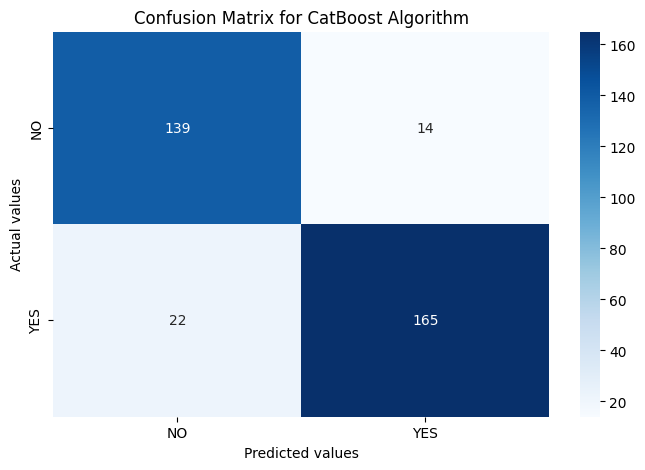

In [70]:
### Check model
CM = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix is : \n', CM)
plt_.figure(figsize=(8,5))
sns.heatmap(data=CM, annot=True,fmt='g', cmap="Blues", xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt_.xlabel('Predicted values')
plt_.ylabel('Actual values')
plt_.title(f'Confusion Matrix for {best_model_name} Algorithm')
plt_.show()

In [71]:
ClassificationReport = classification_report(y_test,y_test_pred,target_names=['NO', 'YES'])
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

          NO       0.86      0.91      0.89       153
         YES       0.92      0.88      0.90       187

    accuracy                           0.89       340
   macro avg       0.89      0.90      0.89       340
weighted avg       0.90      0.89      0.89       340



<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Like this? Upvote and comment! 🌊 End</p></b></h1>